In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
import os
import numpy as np
import tensorflow as tf
from keras import layers
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import  Dropout, Reshape
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.models import Model

In [73]:
def reshaping(x):
  return np.reshape(x,(32,32))

a = np.load('/content/drive/MyDrive/cvpr dataset/train_data10.npz')
x_train, y_train = a['arr_0'], a['arr_1']

xx_train = list((map(reshaping,x_train)))
x_train_ = np.array(xx_train)


b = np.load('/content/drive/MyDrive/cvpr dataset/test_data.npz')
x_test, y_test = b['arr_0'], b['arr_1']

xx_test = list((map(reshaping,x_test)))
x_test_ = np.array(xx_test)

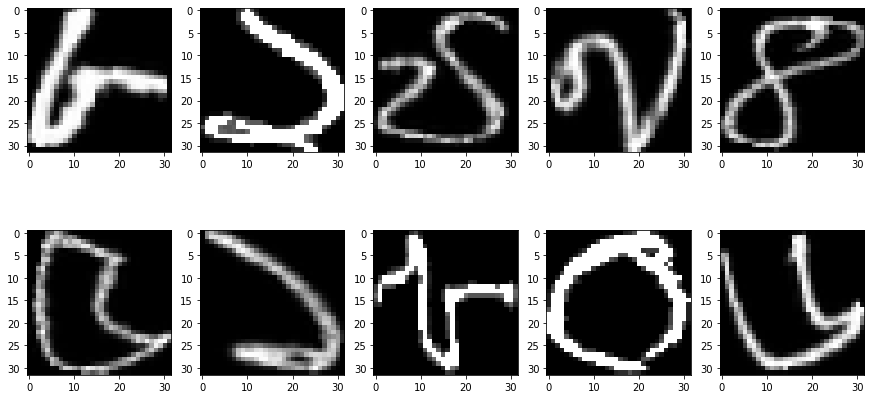

Labels : [[8]
 [1]
 [9]
 [9]
 [4]]
Labels : [[5]
 [1]
 [8]
 [0]
 [6]]


In [74]:
fig1 = plt.figure(figsize = (15,15))

for i in range(5):
    ax1 = fig1.add_subplot(1,5,i+1) 
    ax1.imshow(x_train_[i], interpolation='none', cmap=plt.cm.gray)
    ax2 = fig1.add_subplot(2,5,i+6) 
    ax2.imshow(x_train_[i+6], interpolation='none', cmap=plt.cm.gray)
plt.show()

print("Labels : {}".format(y_train[0:5]))
print("Labels : {}".format(y_train[6:11]))

In [75]:
# Normalizing the input
x_train_ = x_train_.astype('float32')
x_train_/=255

x_test_ = x_test_.astype('float32')
x_test_/=255

print(x_train_.shape)
print(x_test_.shape)

(54000, 32, 32)
(4000, 32, 32)


In [76]:
y_train_ = to_categorical(y_train, num_classes=10, dtype='float32')
y_test_ = to_categorical(y_test, num_classes=10, dtype='float32')

print("Train Set Size = {} images".format(y_train.shape[0]))
print("Test Set Size = {} images".format(y_test.shape[0]))

Train Set Size = 54000 images
Test Set Size = 4000 images


In [77]:
# load model
from keras import models    
model_new = models.load_model('/content/drive/MyDrive/model/vgg16_model_test6.h5')
#set trainable false for pretrained model
for layer in model_new.layers[:-10]:
    layer.trainable = False

for l in model_new.layers:
    print(l.name, l.trainable)

input_2 False
block1_conv1 False
batch_normalization_10 False
activation_10 False
block1_conv2 False
batch_normalization_11 False
activation_11 False
block1_pool False
block2_conv1 False
batch_normalization_12 False
activation_12 False
block2_conv2 False
batch_normalization_13 False
activation_13 False
block2_pool False
block3_conv1 False
batch_normalization_14 False
activation_14 False
block3_conv2 False
batch_normalization_15 False
activation_15 False
block3_conv3 False
batch_normalization_16 False
activation_16 False
block3_pool False
block4_conv1 False
batch_normalization_17 False
activation_17 False
block4_conv2 False
batch_normalization_18 False
activation_18 False
block4_conv3 False
batch_normalization_19 False
activation_19 False
block4_pool False
dropout_4 True
flatten_1 True
dropout_5 True
fc1 True
dropout_6 True
fc2 True
dropout_7 True
fc3 True
dropout_8 True
predictions True


In [78]:
model_new.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        640       
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                            

In [79]:
optimizer = 'adam'
objective = 'categorical_crossentropy'

#extract layer weight
last_layer = model_new.get_layer('block2_pool')
last_output = last_layer.output

net = Dropout(rate=.2)(last_output)
net = Flatten()(net)
net = Dropout(rate=.5)(net)
net = Dense(2048, activation='relu', name='fc')(net)
net = Dropout(rate=.2)(net)
net = Dense(1024, activation='relu', name='fc2')(net)
net = Dropout(rate=.2)(net)
net = Dense(512, activation='relu', name='fc3')(net)
net = Dropout(rate=.2)(net)
net = Dense(10, activation='softmax', name='predictions_utl')(net)

# Create model
model_n = Model(inputs = model_new.input, outputs = net, name='vgg16_utl')
model_n.compile(optimizer=optimizer, loss=objective, metrics=['accuracy'])

model_n.summary()

Model: "vgg16_utl"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        640       
                                                                 
 batch_normalization_10 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_11 (Bat  (None, 32, 32, 64)       256       
 chNormalization)                                        

In [80]:
for l in model_n.layers:
    print(l.name, l.trainable)

input_2 False
block1_conv1 False
batch_normalization_10 False
activation_10 False
block1_conv2 False
batch_normalization_11 False
activation_11 False
block1_pool False
block2_conv1 False
batch_normalization_12 False
activation_12 False
block2_conv2 False
batch_normalization_13 False
activation_13 False
block2_pool False
dropout_20 True
flatten_4 True
dropout_21 True
fc True
dropout_22 True
fc2 True
dropout_23 True
fc3 True
dropout_24 True
predictions_utl True


In [81]:
nb_epoch = 100
batch_size = 64

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

ret = model_n.fit(x_train_.reshape((-1,32,32,1)), y_train_, 
                  epochs=nb_epoch, batch_size=batch_size, verbose=1,
                  #validation_split=0.3,
                  validation_data=(x_test_, y_test_),
                  callbacks=[es])

Epoch 1/100
844/844 [==============================] - 21s 24ms/step - loss: 0.2343 - accuracy: 0.9356 - val_loss: 0.0662 - val_accuracy: 0.9750
Epoch 2/100
844/844 [==============================] - 20s 24ms/step - loss: 0.0913 - accuracy: 0.9732 - val_loss: 0.0718 - val_accuracy: 0.9765
Epoch 3/100
844/844 [==============================] - 21s 25ms/step - loss: 0.0771 - accuracy: 0.9782 - val_loss: 0.0414 - val_accuracy: 0.9872
Epoch 4/100
844/844 [==============================] - 20s 24ms/step - loss: 0.0687 - accuracy: 0.9804 - val_loss: 0.0577 - val_accuracy: 0.9830
Epoch 5/100
844/844 [==============================] - 20s 24ms/step - loss: 0.0630 - accuracy: 0.9830 - val_loss: 0.0499 - val_accuracy: 0.9872
Epoch 6/100
844/844 [==============================] - 20s 24ms/step - loss: 0.0555 - accuracy: 0.9847 - val_loss: 0.0312 - val_accuracy: 0.9898
Epoch 7/100
844/844 [==============================] - 20s 24ms/step - loss: 0.0528 - accuracy: 0.9867 - val_loss: 0.0396 - val_ac

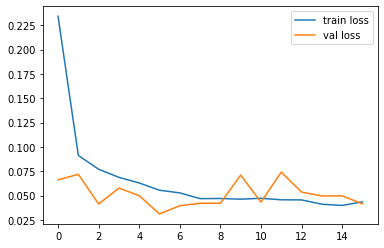

In [82]:
plt.plot(ret.history['loss'], label='train loss')
plt.plot(ret.history['val_loss'], label='val loss')
plt.legend()
plt.show()

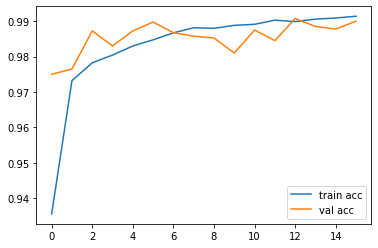

In [83]:
plt.plot(ret.history['accuracy'], label='train acc')
plt.plot(ret.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [84]:
# evaluate the model
_, train_acc = model_n.evaluate(x_train_, y_train_, verbose=0)
_, test_acc = model_n.evaluate(x_test_, y_test_, verbose=0)
print('Train accuracy: %.3f, Test accuracy: %.3f' % (train_acc, test_acc))

Train accuracy: 0.998, Test accuracy: 0.990


In [85]:
predictions = model_n.predict(x_test_.reshape((-1,32,32,1)), verbose=0)

In [86]:
def test_accuracy():
    err = []
    t = 0
    for i in range(predictions.shape[0]):
        if (np.argmax(predictions[i]) == y_test[i]):
            t = t+1
        else:
            err.append(i)
    return t, float(t)*100/predictions.shape[0], err

In [87]:
p = test_accuracy()
print("Test accuracy: {} %".format(p[1]))

Test accuracy: 99.0 %


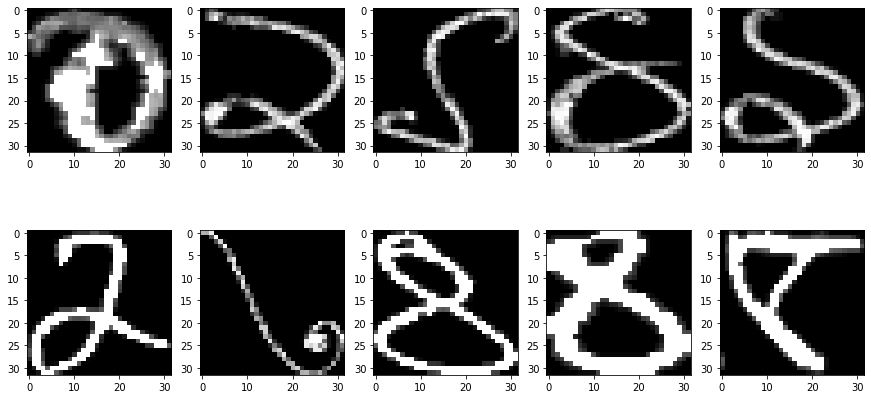

True:          [[0]
 [1]
 [1]
 [1]
 [1]]
classified as: [1 2 4 4 9]
True:          [[2]
 [3]
 [4]
 [4]
 [5]]
classified as: [1 6 1 1 4]


In [88]:
fig1 = plt.figure(figsize = (15,15))

for i in range(5):
    ax1 = fig1.add_subplot(1,5,i+1) 
    ax1.imshow(x_test_[p[2][i]], interpolation='none', cmap=plt.cm.gray)
    ax2 = fig1.add_subplot(2,5,i+6) 
    ax2.imshow(x_test_[p[2][i+6]], interpolation='none', cmap=plt.cm.gray)
plt.show()

print("True:          {}".format(y_test[p[2][0:5]]))
print("classified as: {}".format(np.argmax(predictions[p[2][0:5]], axis=1)))

print("True:          {}".format(y_test[p[2][6:11]]))
print("classified as: {}".format(np.argmax(predictions[p[2][6:11]], axis=1)))